In [28]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [17]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df['target'] = iris.target
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


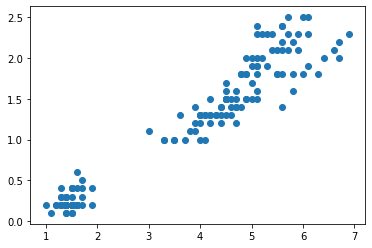

In [18]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

Text(0, 0.5, 'petal width (cm)')

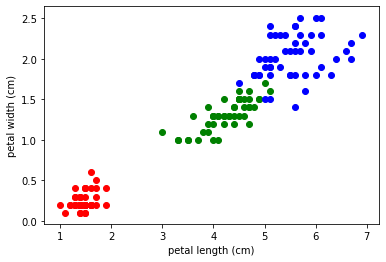

In [24]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [27]:
df_n = df.drop('target', axis='columns')
df_n

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [34]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_n)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
df_n['cluster'] = y_predicted
df_n.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Text(0, 0.5, 'petal width (cm)')

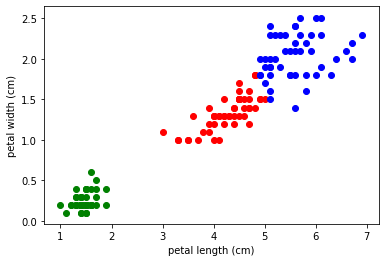

In [37]:
df1 = df_n[df_n.cluster==0]
df2 = df_n[df_n.cluster==1]
df3 = df_n[df_n.cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [44]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_n[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
    

Text(0, 0.5, 'Sum of squared error')

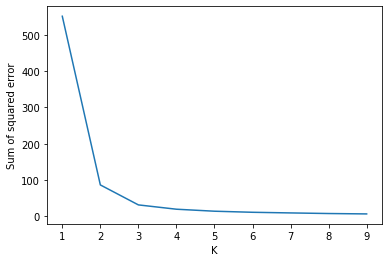

In [47]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')